# House Price Prediction , Yash Dave


## Import Data From CSV into Python Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("1553768847_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Filling the missing values with the mean of the respective column.

In [ ]:
df.total_bedrooms.fillna(df.total_bedrooms.mean() , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Encoding Categorical data

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


### ocean_proximity Is non numerical and hence needs to be encoded

In [ ]:
prox = pd.get_dummies(df.ocean_proximity)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df['ocean_proximity'] = labelencoder.fit_transform(df.ocean_proximity)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [ ]:
features = df.iloc[:,0:9]
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [ ]:
labels = df.iloc[:,-1]
labels

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

## Split the data into 80% training dataset and 20% test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain , ytest = train_test_split(features , labels, test_size = 0.2)

In [ ]:
xtrain.shape

(16512, 9)

In [ ]:
ytrain.shape

(16512,)

In [ ]:
xtest.shape

(4128, 9)

In [ ]:
ytest.shape

(4128,)

## Standardize data 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.transform(xtest)

In [ ]:
scaled_ytrain = scaler.fit_transform(ytrain.values.reshape(-1,1))
scaled_ytest = scaler.transform(ytest.values.reshape(-1,1))

In [ ]:
scaled_xtrain.shape

(16512, 9)

In [ ]:
scaled_ytrain.shape

(16512, 1)

In [ ]:
scaled_xtest.shape

(4128, 9)

In [ ]:
scaled_ytest.shape

(4128, 1)

## Perform Linear Regression with one independent variable :


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(scaled_xtrain, scaled_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = model.predict(scaled_xtest)
pred

array([[-0.76996401],
       [-0.68563751],
       [ 0.17898598],
       ...,
       [-0.1266217 ],
       [ 0.05528331],
       [-0.41413153]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(scaled_ytest, pred)

In [ ]:
MSE

0.37852917370266104

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

0.6152472459935607

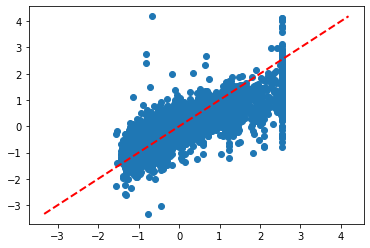

In [ ]:
import matplotlib.pyplot as pyplot
plt.scatter(scaled_ytest, pred)
plt.plot([pred.min(), pred.max()], [pred.min(), pred.max()], "k--", lw=2 , color="red")